### Error rates: supplement for lecture notes on convergence

Note: to run, just make sure to run the preamble cell below first. Most of the code should in each section should be standalone.

Most of the preamble is just to set some defaults for plotting; when writing code you can, of course, just input figure sizes, etc. directly and use (mostly) default font sizes.


In [3]:
# PREAMBLE (run first!)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#set up some defaults for plotting in this notebook, including default figure sizes
# presentation mode just embiggens the text, labels etc. for better visuals.
presentation_mode = True;
if presentation_mode:
    scale = 1;
    medium = (5.5, 4)  # normal figsize for plots (figsize = medium)
    wide = (11, 5)  # wide size (for figures with 1 x 2 subplots)
    mpl.rcParams['axes.titlesize'] = 20*scale
    mpl.rcParams['legend.fontsize'] = 20*scale
    mpl.rcParams['axes.labelsize'] = 20*scale
    mpl.rcParams['lines.linewidth'] = 2*scale
    mpl.rcParams['lines.markersize'] = 16*scale
    mpl.rcParams['xtick.labelsize'] = 18*scale
    mpl.rcParams['ytick.labelsize'] = 18*scale
else:
    scale = 1.25;
    medium = (3.7, 3)
    wide = (8, 3)
    mpl.rcParams['axes.titlesize'] = 12*scale
    mpl.rcParams['legend.fontsize'] = 10*scale
    mpl.rcParams['axes.labelsize'] = 10*scale
    mpl.rcParams['lines.linewidth'] = 1.5*scale
    mpl.rcParams['lines.markersize'] = 10*scale
    mpl.rcParams['xtick.labelsize'] = 10*scale
    mpl.rcParams['ytick.labelsize'] = 10*scale

# `linear convergence' - convergence plot

This (somewhat confusing) name refers to errors with a rate like $r^n$ (equivalently $e^{-cn}$).

Let's consider a sequence

$$ a_n = 2^{-n} + 100\cdot 3^{-n}$$

which converges to $0$ as $n\to \infty$. The convergence is linear, since

$$ a_n \sim 2^{-n} \qquad \text{(rate} =\frac{1}{2})$$

We can show this in a plot by observing that 

$$ a_n \approx Cr^n \implies \log(a_n) = \log C + n \log r $$

so a plot of $\log (a_n)$ vs. $n$ is linear with slope $\log r$.

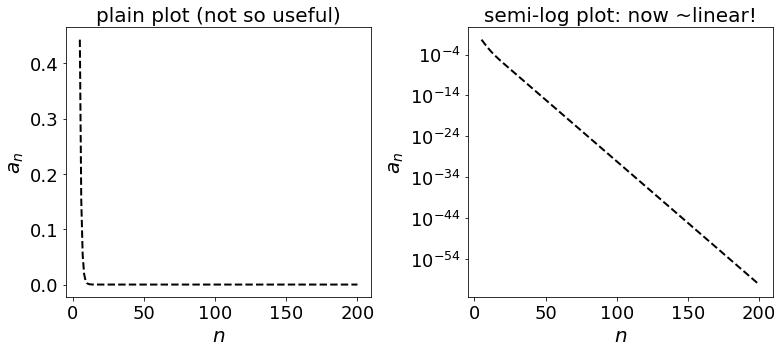

In [65]:
n = np.arange(5, 201, dtype=float)  # n-values (as floats)
seq = 2**(-n) + 100*3**(-n)  #use vectorized arith.

fig, ax = plt.subplots(1,2,figsize=wide)
plt.subplot(121)
plt.title("plain plot (not so useful)")
plt.plot(n, seq, '--k')
plt.xlabel('$n$')
plt.ylabel('$a_n$');

plt.subplot(122)
plt.title("semi-log plot: now ~linear!")
plt.semilogy(n, seq, '--k')
plt.xlabel('$n$')
plt.ylabel('$a_n$');
fig.tight_layout()

### Note on semilog plot of a vs. just plotting log(a)

The semilogy plot is equivalent to just plotting $\log (a_n)$ vs. $n$ 
on a regular plot, except that it labels the y-axis with $a_n$ instead of $\log(a_n)$:

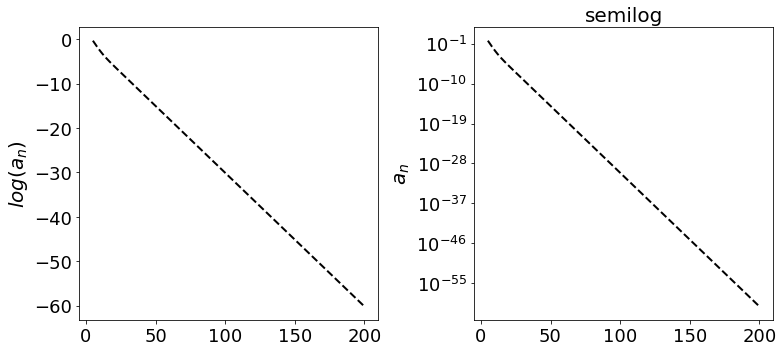

In [62]:

fig, ax = plt.subplots(1,2,figsize=wide)
plt.subplot(121)
plt.plot(n, np.log10(seq), '--k')
plt.ylabel('$log(a_n)$');
plt.subplot(122)
plt.title('semilog')
plt.semilogy(n, seq, '--k')
plt.ylabel('$a_n$');
fig.tight_layout()

# Order $p$ convergence plot

Now suppose an error has the form 

$$ e_n \approx Cn^{-p}, \qquad n \to\infty$$
or alternatively,

$$ e(h) \approx Ch^p, \qquad h \to 0. $$ 

Taking logs, we see that 

$$ \log(e_n) = \log C - p \log n $$

which means that a plot of $\log e_n$ vs. $\log n$ will be linear - a log-log plot!

The slope of the line will be $p$, the `order' of convergence.

**Note** :to have equally spaced points on the log-log plot, we need *log-spaced* values of n, e.g.

$$ n = 2^{k} \text{ for } k=1,2,\cdots, $$

so that the set of $\log(n)$'s is equally spaced. In the example below, we plot

$$ e_n = \frac{1}{n^3} + \frac{2}{n^4} $$

against these values of $n$ and observe the log-log plot has a slope of $-2$.

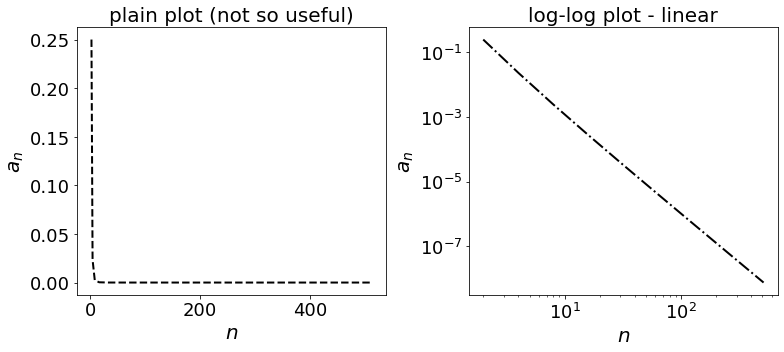

In [6]:
powers = np.arange(1, 10, dtype=float)
n = 2**powers

seq = 1/n**3 + 2/n**4

fig, ax = plt.subplots(1,2,figsize=wide)
plt.subplot(121)
plt.title("plain plot (not so useful)")
plt.plot(n, seq, '--k')
plt.xlabel('$n$')
plt.ylabel('$a_n$');

plt.subplot(122)
plt.title("log-log plot - linear")
plt.loglog(n, seq, '-.k')
plt.xlabel('$n$')
plt.ylabel('$a_n$');
fig.tight_layout()

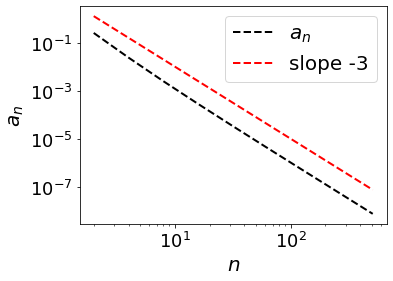

In [5]:
# now let's add a reference line of slope -3:
ref = 10/n**3  # build C/n^3 line to plot
# (just make sure it doesn't overlap with seq too much)
plt.figure(figsize=medium)
plt.loglog(n, seq, '-k', n, ref, '--r')
plt.xlabel('$n$')
plt.ylabel('$a_n$');
plt.legend(['$a_n$', 'slope -3'])
fig.tight_layout()

### On log-log plots vs. plots of the logs:

As before, the log-log plot of $(n,e_n)$ is just a plot of  $(\log(n), \log(e_n))$, but the axis labels are $n$ and $e_n$. Each unit of distance along an axis corresponds to a change in exponent (e.g. $10^{-1}$ to $10^{-2}$ and $10^{-2}$ to $10^{-3}$ are the same distance apart).